In [23]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.array([[1, 2], [1, 4], [1, 0],
           [10, 2], [10, 4], [10, 0]])

In [3]:
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  2],
       [10,  4],
       [10,  0]])

In [4]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X)

In [5]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0])

In [6]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0])

In [7]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [16]:
kmeans.inertia_ #Wcss

16.0

In [8]:
from sklearn.metrics import silhouette_score

In [9]:
silhouette_score(X,labels=kmeans.labels_)

0.7133477791749615

In [13]:
df = pd.read_csv('Mall_Customers.csv')

In [14]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
# import dataset
# k=3,4,5,6,7  Check with different k-values
# wcss/inertia
# plot it and find the optimal k-value
# silhoute score and dunn index



In [22]:
wcss=[]
for i in [2,3] : # 2 and 3 cluster
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=40)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss values')

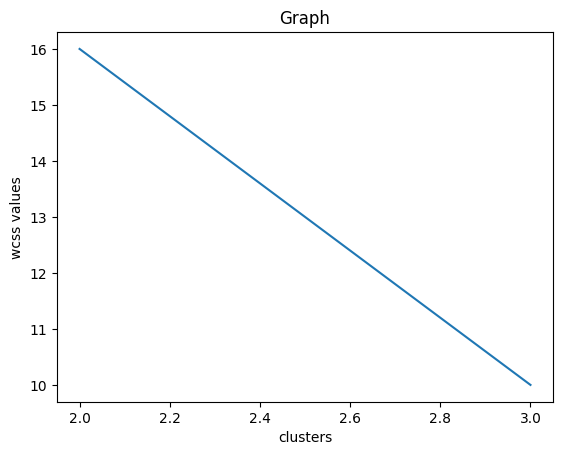

In [26]:
plt.plot([2,3],wcss)
plt.title('Graph')
plt.xlabel('clusters')
plt.ylabel('wcss values')

# AgglomerativeClustering

In [27]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
               [4, 2], [4, 4], [4, 0]])

In [32]:
X

array([[1, 2],
       [1, 4],
       [1, 0],
       [4, 2],
       [4, 4],
       [4, 0]])

In [29]:
clustering = AgglomerativeClustering()
clustering.fit(X)

AgglomerativeClustering()

In [30]:
AgglomerativeClustering()

AgglomerativeClustering()

In [31]:
clustering.labels_

array([1, 1, 1, 0, 0, 0], dtype=int64)

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



data = pd.read_csv('Mall_Customers.csv')
data = data[['Annual Income (k$)'],['Spending Score (1-100)']]

X = np.array(data)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

InvalidIndexError: (['Annual Income (k$)'], ['Spending Score (1-100)'])